<a href="https://colab.research.google.com/github/arpan2233/Deep-Learning/blob/main/Linear_NonLinearSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy matplotlib scikit-learn


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split


In [3]:
# Generate linearly separable data
X_linear, y_linear = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=42)


In [4]:
# Generate non-linearly separable data (moon-shaped)
X_nonlinear, y_nonlinear = make_moons(n_samples=100, noise=0.1, random_state=42)

# Split into training and testing sets
X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear = train_test_split(
    X_nonlinear, y_nonlinear, test_size=0.2, random_state=42)


In [5]:
# Train Linear SVM
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train_linear, y_train_linear)

# Print accuracy
print("Linear SVM Accuracy:", svm_linear.score(X_test_linear, y_test_linear))


Linear SVM Accuracy: 1.0


In [6]:
# Train Non-Linear SVM (RBF Kernel)
svm_nonlinear = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_nonlinear.fit(X_train_nonlinear, y_train_nonlinear)

# Print accuracy
print("Non-Linear SVM Accuracy:", svm_nonlinear.score(X_test_nonlinear, y_test_nonlinear))


Non-Linear SVM Accuracy: 1.0


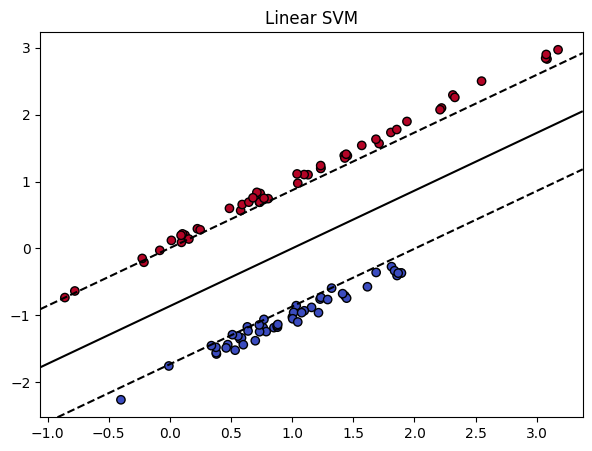

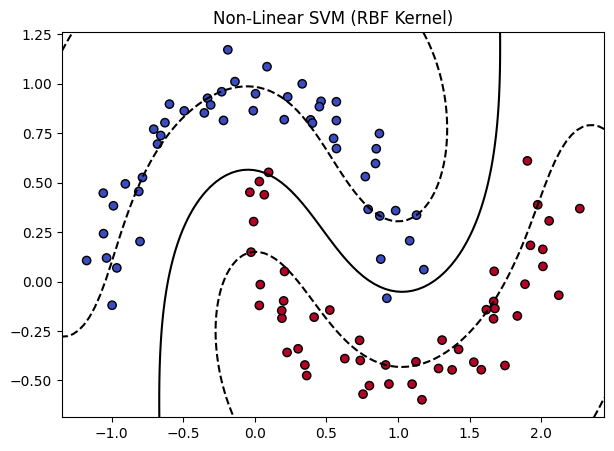

In [7]:
def plot_svm_boundary(model, X, y, title):
    plt.figure(figsize=(7,5))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))

    # Get model predictions
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contour(xx, yy, Z, colors='black', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    plt.title(title)
    plt.show()

# Plot Linear SVM
plot_svm_boundary(svm_linear, X_linear, y_linear, "Linear SVM")

# Plot Non-Linear SVM
plot_svm_boundary(svm_nonlinear, X_nonlinear, y_nonlinear, "Non-Linear SVM (RBF Kernel)")
